In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/CrudeOilProduction1.csv')
data.head(10)

,Year,Unnamed: 1,12/12/1992,12/12/1993,12/12/1994,12/12/1995,12/21/1996,12/12/1997,12/12/1998,12/12/1999,...,12/12/2009,12/12/2010,12/12/2011,12/12/2012,12/12/2013,12/12/2014,12/12/2015,12/12/2016,12/12/2017,12/12/2018
0,United States,NaN,7171.0,6847.0,6661.627397,6559.589041,6464.557377,6451.435616,6251.909589,5881.460274,...,5349.098649,5477.672452,5654.271227,6501.516473,7466.936953,8758.599863,9430.652088,8830.672139,9351.715156,10961.789130
1,Saudi Arabia,NaN,8332.0,8198.0,8119.873973,8231.232877,8218.117486,8362.175342,8388.904110,7833.391781,...,8250.112447,8900.000000,9458.356164,9832.322404,9693.150685,9735.342466,10168.246580,10460.710380,10133.753420,10425.136990
2,Russia,NaN,7632.0,6730.0,6135.084932,5995.221918,5849.874317,5920.084932,5853.882192,6078.983562,...,9495.364932,9694.114466,9773.517808,9921.609290,10053.843840,10107.087670,10252.854790,10551.497270,10580.191780,10758.660270
3,Canada,NaN,1605.0,1679.0,1746.194521,1805.271233,1836.674863,1922.394521,1981.084932,1906.635616,...,2579.479849,2740.756164,2900.646575,3137.838798,3325.128767,3613.224658,3677.126027,3679.046448,3976.665753,4263.947945
4,Iraq,NaN,425.0,512.0,552.534247,560.000000,578.543716,1155.057534,2150.041096,2507.876712,...,2390.591537,2399.302526,2625.684932,2983.333333,3054.383562,3368.041096,4045.041096,4443.516393,4453.684932,4612.695890
5,Iran,NaN,3429.0,3540.0,3618.054795,3643.219178,3685.710383,3664.178082,3633.767123,3557.164384,...,4037.038348,4080.418951,4054.000000,3386.849727,3113.298630,3239.068493,3293.189041,4151.166667,4468.695890,4253.643836
6,China,NaN,2845.0,2890.0,2939.287671,2990.049315,3131.338798,3200.342466,3198.178082,3194.994521,...,3795.958630,4078.360274,4052.055616,4074.074317,4163.816712,4208.254795,4277.693151,3983.480874,3821.230137,3772.876712
7,UAE,NaN,2266.0,2159.0,2193.241096,2232.649315,2277.650273,2316.424658,2345.301370,2169.246575,...,2560.000000,2570.000000,2849.178082,2993.606557,2938.000000,3010.191781,3149.452055,3242.650273,3174.178082,3216.479452
8,Brazil,NaN,626.0,643.0,671.424657,695.424657,795.002732,841.197260,968.627397,1131.772603,...,1950.364030,2054.667995,2105.407984,2061.225495,2023.875466,2254.600307,2437.444901,2515.459016,2621.797260,2586.539726
9,Kuwait,NaN,1058.0,1852.0,2025.139726,2057.410959,2061.693989,2007.268493,2085.342466,1897.717808,...,2350.000000,2300.410959,2530.136986,2634.945355,2650.000000,2642.054795,2783.671233,2904.825137,2752.876712,2807.041096


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 220 entries, Year to Date
dtypes: float64(133), int64(86), object(1)
memory usage: 46.5+ KB


In [ ]:
#Missing values computation

data.isnull().sum()

Year            0
Unnamed: 1    218
12/12/1992      0
12/12/1993      0
12/12/1994      0
12/12/1995      0
12/21/1996      0
12/12/1997      0
12/12/1998      0
12/12/1999      0
12/12/2000      0
12/12/2001      0
12/12/2002      0
12/12/2003      0
12/12/2004      0
12/12/2005      0
12/12/2006      0
12/12/2007      0
12/12/2008      0
12/12/2009      0
12/12/2010      0
12/12/2011      0
12/12/2012      0
12/12/2013      0
12/12/2014      0
12/12/2015      0
12/12/2016      0
12/12/2017      0
12/12/2018      0
dtype: int64

In [ ]:
##data.dropna(0, inplace=True)

In [ ]:

data.dropna(1, inplace=True)


<ipython-input-69-937398ac8e4b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data.dropna(1, inplace=True)


In [ ]:
data.isna().sum()

Year    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64

In [ ]:
data.head(10)

,Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,7171,6847,6661.627397,6559.589041,6464.557377,6451.435616,6251.909589,5881.460274,5821.601095,...,5349.098649,5477.672452,5654.271227,6501.516473,7466.936953,8758.599863,9430.652088,8830.672139,9351.715156,10961.78913
1,Saudi Arabia,8332,8198,8119.873973,8231.232877,8218.117486,8362.175342,8388.90411,7833.391781,8403.79918,...,8250.112447,8900,9458.356164,9832.322404,9693.150685,9735.342466,10168.24658,10460.71038,10133.75342,10425.13699
2,Russia,7632,6730,6135.084932,5995.221918,5849.874317,5920.084932,5853.882192,6078.983562,6479.202,...,9495.364932,9694.114466,9773.517808,9921.60929,10053.84384,10107.08767,10252.85479,10551.49727,10580.19178,10758.66027
3,Canada,1605,1679,1746.194521,1805.271233,1836.674863,1922.394521,1981.084932,1906.635616,1976.893443,...,2579.479849,2740.756164,2900.646575,3137.838798,3325.128767,3613.224658,3677.126027,3679.046448,3976.665753,4263.947945
4,Iraq,425,512,552.5342466,560,578.5437158,1155.057534,2150.041096,2507.876712,2570.68306,...,2390.591537,2399.302526,2625.684932,2983.333333,3054.383562,3368.041096,4045.041096,4443.516393,4453.684932,4612.69589
5,Iran,3429,3540,3618.054795,3643.219178,3685.710383,3664.178082,3633.767123,3557.164384,3696.3,...,4037.038348,4080.418951,4054,3386.849727,3113.29863,3239.068493,3293.189041,4151.166667,4468.69589,4253.643836
6,China,2845,2890,2939.287671,2990.049315,3131.338798,3200.342466,3198.178082,3194.994521,3248.762295,...,3795.95863,4078.360274,4052.055616,4074.074317,4163.816712,4208.254795,4277.693151,3983.480874,3821.230137,3772.876712
7,UAE,2266,2159,2193.241096,2232.649315,2277.650273,2316.424658,2345.30137,2169.246575,2367.827869,...,2560,2570,2849.178082,2993.606557,2938,3010.191781,3149.452055,3242.650273,3174.178082,3216.479452
8,Brazil,626,643,671.4246575,695.4246575,795.0027322,841.1972603,968.6273973,1131.772603,1269,...,1950.36403,2054.667995,2105.407984,2061.225495,2023.875466,2254.600307,2437.444901,2515.459016,2621.79726,2586.539726
9,Kuwait,1058,1852,2025.139726,2057.410959,2061.693989,2007.268493,2085.342466,1897.717808,2078.5,...,2350,2300.410959,2530.136986,2634.945355,2650,2642.054795,2783.671233,2904.825137,2752.876712,2807.041096


In [ ]:

df = pd.DataFrame(data=data)



In [ ]:
df = df.transpose()

In [ ]:
df.to_csv('CrudeOilProduction3.csv')

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
Year,United States,Saudi Arabia,Russia,Canada,Iraq,Iran,China,UAE,Brazil,Kuwait,...,Tonga,Turks and Caicos Islands,U.S. Pacific Islands,Uganda,Vanuatu,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara,Zambia
12/12/1992,7171.0,8332.0,7632.0,1605.0,425.0,3429.0,2845.0,2266.0,626.0,1058.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/1993,6847.0,8198.0,6730.0,1679.0,512.0,3540.0,2890.0,2159.0,643.0,1852.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/1994,6661.627397,8119.873973,6135.084932,1746.194521,552.534247,3618.054795,2939.287671,2193.241096,671.424657,2025.139726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/1995,6559.589041,8231.232877,5995.221918,1805.271233,560.0,3643.219178,2990.049315,2232.649315,695.424657,2057.410959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/21/1996,6464.557377,8218.117486,5849.874317,1836.674863,578.543716,3685.710383,3131.338798,2277.650273,795.002732,2061.693989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/1997,6451.435616,8362.175342,5920.084932,1922.394521,1155.057534,3664.178082,3200.342466,2316.424658,841.19726,2007.268493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/1998,6251.909589,8388.90411,5853.882192,1981.084932,2150.041096,3633.767123,3198.178082,2345.30137,968.627397,2085.342466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/1999,5881.460274,7833.391781,6078.983562,1906.635616,2507.876712,3557.164384,3194.994521,2169.246575,1131.772603,1897.717808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/12/2000,5821.601095,8403.79918,6479.202,1976.893443,2570.68306,3696.3,3248.762295,2367.827869,1269.0,2078.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace= True)


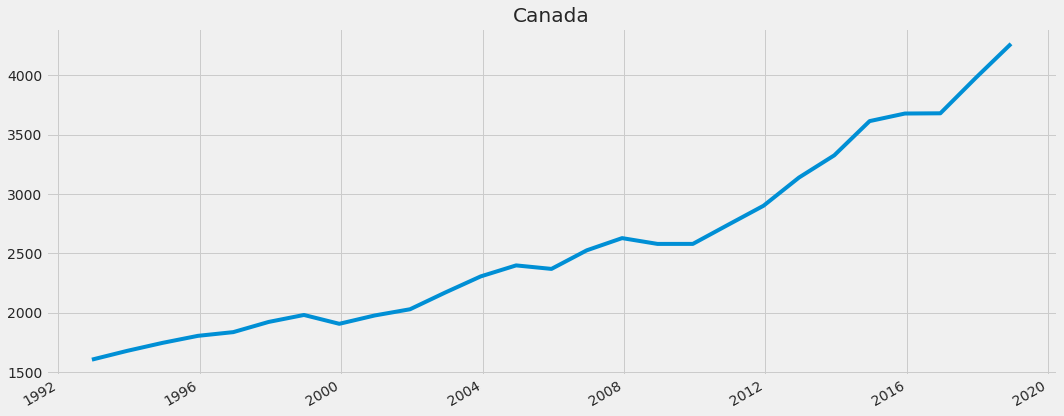

In [ ]:
plt.figure(figsize=(15, 6))
df['Canada'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Canada")
plt.tight_layout()
plt.show()

In [ ]:
n_cols = 1
dataset = df['Canada']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(27, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [ ]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 20 Test Size : 7


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(20, 1)

In [ ]:
x_train = []
y_train = []
time_steps = 13
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.        ],
       [0.02783056],
       [0.05310165],
       [0.07531973],
       [0.08713027],
       [0.11936846],
       [0.14144125],
       [0.11344172],
       [0.13986488],
       [0.15952648],
       [0.21271571],
       [0.26353507],
       [0.2983965 ]])]
y_train: [array([0.28728565])]


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [ ]:
x_train.shape , y_train.shape

((14, 13, 1), (14, 1))

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(13, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics= "mean_absolute_error")
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 13, 200)           161600    
                                                                 
 lstm_41 (LSTM)              (None, 13, 100)           120400    
                                                                 
 lstm_42 (LSTM)              (None, 50)                30200     
                                                                 
 dense_34 (Dense)            (None, 20)                1020      
                                                                 
 dense_35 (Dense)            (None, 10)                210       
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 313,441
Trainable params: 313,441
Non-t

In [ ]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3830 - mean_absolute_error: 0.5777
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 0.3759 - mean_absolute_error: 0.5718
Epoch 3/100
1/1 [==============================] - 0s 61ms/step - loss: 0.3679 - mean_absolute_error: 0.5650
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 0.3575 - mean_absolute_error: 0.5561
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 0.3465 - mean_absolute_error: 0.5465
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 0.3351 - mean_absolute_error: 0.5363
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.3219 - mean_absolute_error: 0.5243
Epoch 8/100
1/1 [==============================] - 0s 49ms/step - loss: 0.3068 - mean_absolute_error: 0.5104
Epoch 9/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2901 - mean_absolute_error: 0.4946
Epoch 10/100
1/1 [===

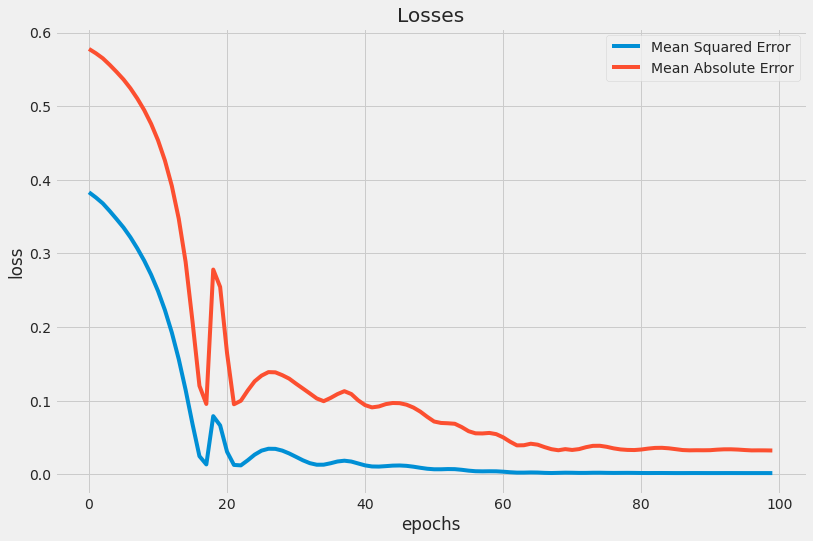

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 13
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
# Get Prediction
predictions = model.predict(x_test)

1/1 [==============================] - 1s 826ms/step


In [ ]:
predictions.shape

(7, 1)

In [ ]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7, 1)

In [ ]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [ ]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

46.45

In [ ]:

preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts


,Predictions,Actuals
0,3058.653809,3137.838798
1,3215.924316,3325.128767
2,3388.709473,3613.224658
3,3590.558594,3677.126027
4,3800.296875,3679.046448
5,4020.566650,3976.665753
6,4273.118164,4263.947945


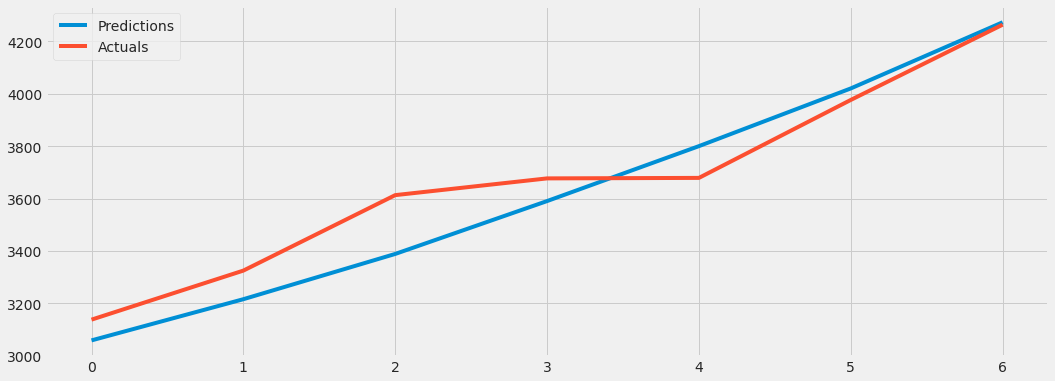

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

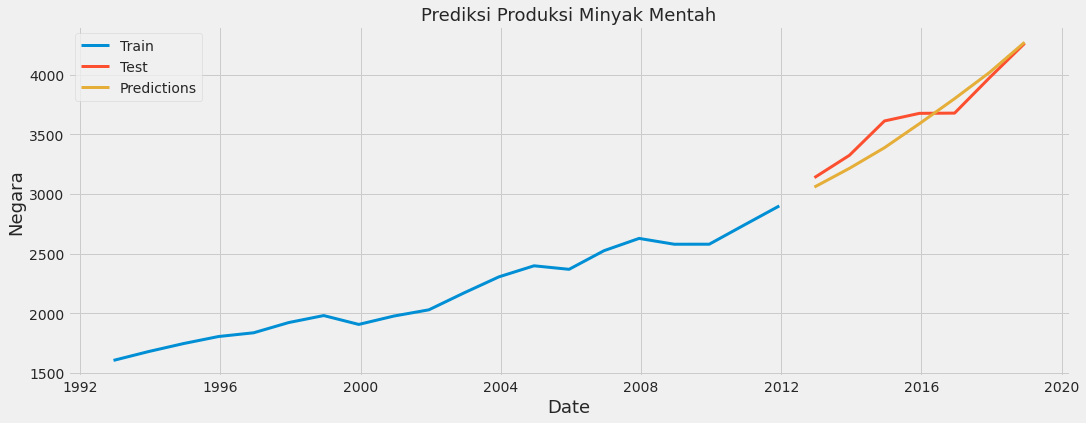

In [ ]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Prediksi Produksi Minyak Mentah', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Negara', fontsize= 18)
plt.plot(train['Canada'], linewidth= 3)
plt.plot(test['Canada'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])